# Introduction
In this notebook, we implement logistic regression and apply it to two
diﬀerent datasets.

## Logistic Regression

## Implementation
### Sigmoid function
Before you start with the actual cost function, recall that the logistic regres-
sion hypothesis is defined as: $h_θ(x) = g(θ^Tx)$
where function g is the sigmoid function. The sigmoid function is defined as:
$g(z) = \frac{1}{1 + e^{−z}}$.

We implement this function so it can be called by the rest of your program.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
import sklearn.linear_model

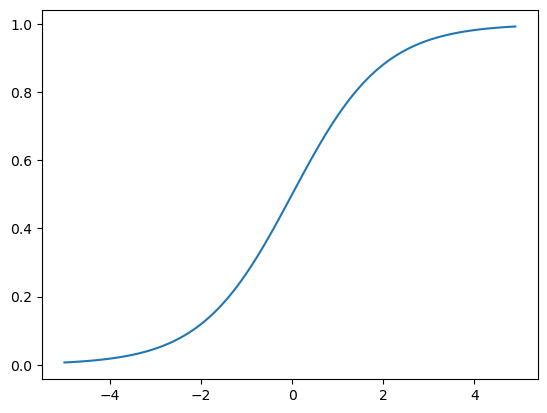

In [2]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

xs = np.arange(-5, 5, 0.1)
ys = sigmoid(xs)
plt.plot(xs, ys)

In [3]:
def J(X, y):
    """
    Compute the cost function and gradients for logistic regression using Mean Squared Error (MSE).
    
    The function `J` takes as input the feature matrix `X` and target values `y`, and returns a pair of functions:
    - hypothesis: This function computes the predictions for a given parameter vector `theta`
    - cost: This function computes the cost (or objective) of the model for a given parameter vector `theta` using MSE.
    - gradients: This function computes the gradient of the cost function with respect to the parameters `theta`.
    """
    m = len(y)
    ones = np.ones((m, 1))
    X_padded = np.hstack((ones, X))
    epsilon = 1e-10  # To avoid log(0)

    hypothesis = lambda theta:  sigmoid(X_padded @ np.array(theta))
    cost = lambda theta: np.sum(-y*np.log(hypothesis(theta)+epsilon) - (1-y)*np.log(1-hypothesis(theta)+epsilon)) / m

    gradients = lambda theta: (1 / m) * (hypothesis(theta) - y) @ X_padded

    return hypothesis, cost, gradients

In [4]:
# TODO: This does not converge
def logistic1(X, y, theta0=None, learning_rate=0.01, iterations=1000):
    """
    Perform logistic regression using batch gradient descent to minimize 
    the cost function.
    
    This function fits a logistic regression model to the input dataset 
    by iteratively adjusting the parameter vector `theta` using gradient descent.
    """
    theta = np.zeros(X.shape[1]+1) if theta0 is None else theta0
    hypothesis, cost, gradients = J(X, y)
    for i in range(iterations):
        theta -= learning_rate * gradients(theta)
    return theta

In [5]:
def logistic2(X, y, theta0=None):
    """
    Performs logistic regression using a numerical optimization algorithm (L-BFGS-B) to minimize the cost function.
    """

    if theta0 is None: theta0 = np.zeros(X.shape[1]+1)
    predictions, cost, gradients = J(X, y)
    result = scipy.optimize.minimize(fun=cost, jac=gradients, x0=theta0, method='L-BFGS-B')
    return result

In [6]:
def logistic3(X, y, theta0=None):
    """
    Performs logistic regression using a numerical optimization algorithm (BFGS) to minimize the cost function.
    """

    if theta0 is None: theta0 = np.zeros(X.shape[1]+1)
    predictions, cost, gradients = J(X, y)
    result = scipy.optimize.minimize(fun=cost, x0=theta0, method='BFGS')
    return result

In [7]:
def logistic4(X, y):
    model = sklearn.linear_model.LogisticRegression()
    model.fit(X, y)
    return model.intercept_, model.coef_

## First Example
In this part of the exercise, we build a logistic regression model to
predict whether a student gets admitted into a university.

Suppose that you are the administrator of a university department and
you want to determine each applicant’s chance of admission based on their
results on two exams. You have historical data from previous applicants
that you can use as a training set for logistic regression. For each training
example, you have the applicant’s scores on two exams and the admissions
decision.

We build a classification model that estimates an applicant’s
probability of admission based the scores from those two exams. 

## Visualizing the data
Before starting to implement any learning algorithm, it is always good to
visualize the data if possible. Here we load the
data and display it on a 2-dimensional plot.


In [9]:
data1txt = "34.62365962451697,78.0246928153624,0;30.28671076822607,43.89499752400101,0;35.84740876993872,72.90219802708364,0;60.18259938620976,86.30855209546826,1;79.0327360507101,75.3443764369103,1;45.08327747668339,56.3163717815305,0;61.10666453684766,96.51142588489624,1;75.02474556738889,46.55401354116538,1;76.09878670226257,87.42056971926803,1;84.43281996120035,43.53339331072109,1;95.86155507093572,38.22527805795094,0;75.01365838958247,30.60326323428011,0;82.30705337399482,76.48196330235604,1;69.36458875970939,97.71869196188608,1;39.53833914367223,76.03681085115882,0;53.9710521485623,89.20735013750205,1;69.07014406283025,52.74046973016765,1;67.94685547711617,46.67857410673128,0;70.66150955499435,92.92713789364831,1;76.97878372747498,47.57596364975532,1;67.37202754570876,42.83843832029179,0;89.67677575072079,65.79936592745237,1;50.534788289883,48.85581152764205,0;34.21206097786789,44.20952859866288,0;77.9240914545704,68.9723599933059,1;62.27101367004632,69.95445795447587,1;80.1901807509566,44.82162893218353,1;93.114388797442,38.80067033713209,0;61.83020602312595,50.25610789244621,0;38.78580379679423,64.99568095539578,0;61.379289447425,72.80788731317097,1;85.40451939411645,57.05198397627122,1;52.10797973193984,63.12762376881715,0;52.04540476831827,69.43286012045222,1;40.23689373545111,71.16774802184875,0;54.63510555424817,52.21388588061123,0;33.91550010906887,98.86943574220611,0;64.17698887494485,80.90806058670817,1;74.78925295941542,41.57341522824434,0;34.1836400264419,75.2377203360134,0;83.90239366249155,56.30804621605327,1;51.54772026906181,46.85629026349976,0;94.44336776917852,65.56892160559052,1;82.36875375713919,40.61825515970618,0;51.04775177128865,45.82270145776001,0;62.22267576120188,52.06099194836679,0;77.19303492601364,70.45820000180959,1;97.77159928000232,86.7278223300282,1;62.07306379667647,96.76882412413983,1;91.56497449807442,88.69629254546599,1;79.94481794066932,74.16311935043758,1;99.2725269292572,60.99903099844988,1;90.54671411399852,43.39060180650027,1;34.52451385320009,60.39634245837173,0;50.2864961189907,49.80453881323059,0;49.58667721632031,59.80895099453265,0;97.64563396007767,68.86157272420604,1;32.57720016809309,95.59854761387875,0;74.24869136721598,69.82457122657193,1;71.79646205863379,78.45356224515052,1;75.3956114656803,85.75993667331619,1;35.28611281526193,47.02051394723416,0;56.25381749711624,39.26147251058019,0;30.05882244669796,49.59297386723685,0;44.66826172480893,66.45008614558913,0;66.56089447242954,41.09209807936973,0;40.45755098375164,97.53518548909936,1;49.07256321908844,51.88321182073966,0;80.27957401466998,92.11606081344084,1;66.74671856944039,60.99139402740988,1;32.72283304060323,43.30717306430063,0;64.0393204150601,78.03168802018232,1;72.34649422579923,96.22759296761404,1;60.45788573918959,73.09499809758037,1;58.84095621726802,75.85844831279042,1;99.82785779692128,72.36925193383885,1;47.26426910848174,88.47586499559782,1;50.45815980285988,75.80985952982456,1;60.45555629271532,42.50840943572217,0;82.22666157785568,42.71987853716458,0;88.9138964166533,69.80378889835472,1;94.83450672430196,45.69430680250754,1;67.31925746917527,66.58935317747915,1;57.23870631569862,59.51428198012956,1;80.36675600171273,90.96014789746954,1;68.46852178591112,85.59430710452014,1;42.0754545384731,78.84478600148043,0;75.47770200533905,90.42453899753964,1;78.63542434898018,96.64742716885644,1;52.34800398794107,60.76950525602592,0;94.09433112516793,77.15910509073893,1;90.44855097096364,87.50879176484702,1;55.48216114069585,35.57070347228866,0;74.49269241843041,84.84513684930135,1;89.84580670720979,45.35828361091658,1;83.48916274498238,48.38028579728175,1;42.2617008099817,87.10385094025457,1;99.31500880510394,68.77540947206617,1;55.34001756003703,64.9319380069486,1;74.77589300092767,89.52981289513276,1"

data1 = np.mat(data1txt)
data1 = np.array(data1)
data1[0:5]

array([[34.62365962, 78.02469282,  0.        ],
       [30.28671077, 43.89499752,  0.        ],
       [35.84740877, 72.90219803,  0.        ],
       [60.18259939, 86.3085521 ,  1.        ],
       [79.03273605, 75.34437644,  1.        ]])

In [10]:
X1 = np.array(data1[:, 0:-1])
y1 = np.array(data1[:, -1]).flatten()
print(X1[0:3])
print(y1[0:3])

[[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]]
[0. 0. 0.]


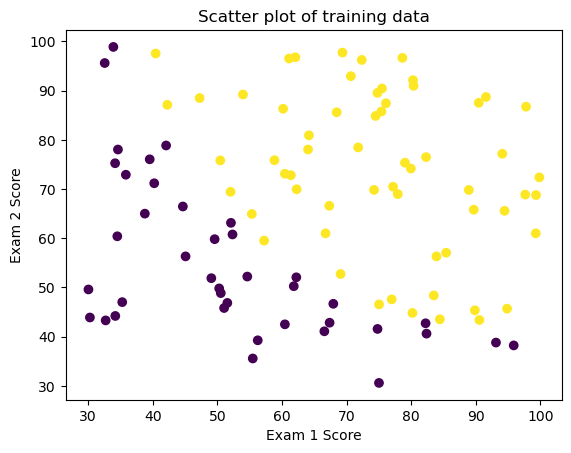

In [12]:
def plotData(data):
    plt.scatter(data[:, 0], data[:, 1], c=data[:, 2])
    plt.xlabel('Exam 1 Score')
    plt.ylabel('Exam 2 Score')
    plt.title('Scatter plot of training data')
    plt.show()

plotData(data1)

In [13]:
logistic1(X1, y1, learning_rate=0.01, iterations=5000)

array([-3.84169298,  0.17760752, -0.29485853])

In [14]:
logistic2(X1, y1)

  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: 0.20349770144568563
        x: [-2.516e+01  2.062e-01  2.015e-01]
      nit: 31
      jac: [-2.257e-08  1.002e-06 -2.688e-06]
     nfev: 36
     njev: 36
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>

In [15]:
logistic3(X1, y1)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.20349770144680052
        x: [-2.516e+01  2.062e-01  2.015e-01]
      nit: 20
      jac: [ 2.049e-08  2.328e-06  5.215e-07]
 hess_inv: [[ 3.218e+03 -2.563e+01 -2.627e+01]
            [-2.563e+01  2.181e-01  1.965e-01]
            [-2.627e+01  1.965e-01  2.297e-01]]
     nfev: 108
     njev: 27

In [16]:
logistic4(X1, y1)

(array([-25.05219314]), array([[0.20535491, 0.2005838 ]]))